In [171]:
# imports
from Bio import SeqIO
import numpy as np
import matplotlib as plt
import seaborn as sns
from scipy.spatial.distance import hamming
from sklearn.manifold import MDS
from sklearn.cluster import KMeans

In [172]:
# parse out just the sequences 
# sequences = []
# for record in SeqIO.parse('HW2.fas', 'fasta'):
#     sequences.append(record.seq)


In [173]:
# parse out just the sequences 
sequences = list(SeqIO.parse('HW2.fas', 'fasta'))
print(len(sequences))

120


In [174]:
# hamming distance calculation
hamm_dist = np.zeros((120,120))
for i in range(120):
    for j in range(120):
        hamm_dist[i, j] = hamming(sequences[i], sequences[j])

In [176]:
#MDS
mdsCalc = MDS(dissimilarity='precomputed')
mdsResult = mdsCalc.fit_transform(hamm_dist)
# mdsResult

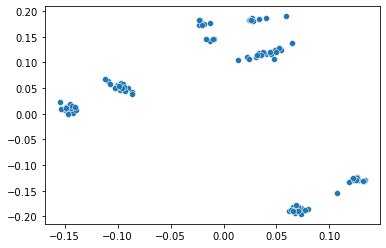

In [185]:
# plot the mds result
mds_plt = sns.scatterplot(*zip(*mdsResult))
# visualy looking at it 8 clusters is good here

In [181]:
# k means clustering setup
kmeans = KMeans(n_clusters=8)
kmeans.fit(mdsResult)

KMeans()

<AxesSubplot:>

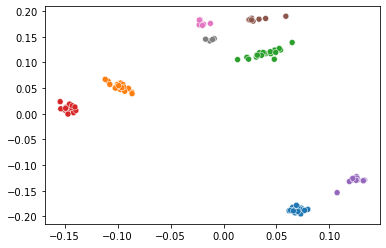

In [182]:
# k means clustering visualisation 
colors = kmeans.labels_
sns.scatterplot(*zip(*mdsResult),hue=colors, palette='tab10', legend=False)